In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
yelp_df = pd.read_csv("../Resources/cleaned_data.csv")

yelp_df.head()

,id,name,image_url,is_closed,url,review_count,rating,transactions,price,cuisines,latitude,longitude,state,city
0,a0IET3_yCFcO36OqGSsisg,Eataly NYC Flatiron,https://s3-media4.fl.yelpcdn.com/bphoto/1UDlnu...,False,https://www.yelp.com/biz/eataly-nyc-flatiron-n...,6100,4.0,"delivery, pickup",2,Italian,40.742101,-73.989922,NY,New York
1,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV...,False,https://www.yelp.com/biz/prince-street-pizza-n...,5026,4.5,"delivery, pickup",1,Italian,40.723088,-73.994530,NY,New York
2,16ZnHpuaaBt92XWeJHCC5A,Olio e Più,https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz...,False,https://www.yelp.com/biz/olio-e-pi%C3%B9-new-y...,4821,4.5,"delivery, pickup",2,Italian,40.733798,-73.999774,NY,New York
3,vyoA8dxwScuMV_AsTcjQcg,L & B Spumoni Gardens,https://s3-media1.fl.yelpcdn.com/bphoto/hN5xKw...,False,https://www.yelp.com/biz/l-and-b-spumoni-garde...,4646,4.0,"delivery, pickup",2,Italian,40.594715,-73.981316,NY,Brooklyn
4,22nKUyCIbpnzR6R3_g1ptQ,Carmine's Italian Restaurant - Times Square,https://s3-media1.fl.yelpcdn.com/bphoto/0UszeE...,False,https://www.yelp.com/biz/carmines-italian-rest...,4640,4.0,"delivery, pickup",2,Italian,40.757498,-73.986653,NY,New York


In [60]:
yelp_df['transactions'].unique()

array(['delivery, pickup', 'delivery', 'pickup', nan,
       'delivery, pickup, restaurant_reservation',
       'delivery, restaurant_reservation, pickup',
       'delivery, restaurant_reservation', 'pickup, delivery',
       'pickup, delivery, restaurant_reservation',
       'restaurant_reservation, pickup, delivery',
       'restaurant_reservation, delivery, pickup',
       'restaurant_reservation, delivery', 'restaurant_reservation',
       'restaurant_reservation, pickup', 'pickup, restaurant_reservation'],
      dtype=object)

In [120]:
# Create new columns and check if 'delivery', 'pickup', or 'restaurant_reservation' is in 'transactions'
yelp_df['delivery'] = yelp_df['transactions'].str.contains('delivery', case=False, na=False)
yelp_df['pickup'] = yelp_df['transactions'].str.contains('pickup', case=False, na=False)
yelp_df['restaurant_reservation'] = yelp_df['transactions'].str.contains('restaurant_reservation', case=False, na=False)

# Fill NaN values with False in the new columns
yelp_df['delivery'] = yelp_df['delivery'].fillna(False)
yelp_df['pickup'] = yelp_df['pickup'].fillna(False)
yelp_df['restaurant_reservation'] = yelp_df['restaurant_reservation'].fillna(False)


In [108]:
yelp_df.drop(columns='transactions', inplace= True)

yelp_df.head()

,id,name,image_url,is_closed,url,review_count,rating,price,cuisines,latitude,longitude,state,city,delivery,pickup,restaurant_reservation
0,a0IET3_yCFcO36OqGSsisg,Eataly NYC Flatiron,https://s3-media4.fl.yelpcdn.com/bphoto/1UDlnu...,False,https://www.yelp.com/biz/eataly-nyc-flatiron-n...,6100,4.0,2,Italian,40.742101,-73.989922,NY,New York,True,True,False
1,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV...,False,https://www.yelp.com/biz/prince-street-pizza-n...,5026,4.5,1,Italian,40.723088,-73.994530,NY,New York,True,True,False
2,16ZnHpuaaBt92XWeJHCC5A,Olio e Più,https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz...,False,https://www.yelp.com/biz/olio-e-pi%C3%B9-new-y...,4821,4.5,2,Italian,40.733798,-73.999774,NY,New York,True,True,False
3,vyoA8dxwScuMV_AsTcjQcg,L & B Spumoni Gardens,https://s3-media1.fl.yelpcdn.com/bphoto/hN5xKw...,False,https://www.yelp.com/biz/l-and-b-spumoni-garde...,4646,4.0,2,Italian,40.594715,-73.981316,NY,Brooklyn,True,True,False
4,22nKUyCIbpnzR6R3_g1ptQ,Carmine's Italian Restaurant - Times Square,https://s3-media1.fl.yelpcdn.com/bphoto/0UszeE...,False,https://www.yelp.com/biz/carmines-italian-rest...,4640,4.0,2,Italian,40.757498,-73.986653,NY,New York,True,True,False


In [68]:
yelp_df.dtypes

id                         object
name                       object
image_url                  object
is_closed                    bool
url                        object
review_count                int64
rating                    float64
price                       int64
cuisines                   object
latitude                  float64
longitude                 float64
state                      object
city                       object
restaurant_reservation       bool
pickup                       bool
delivery                     bool
dtype: object

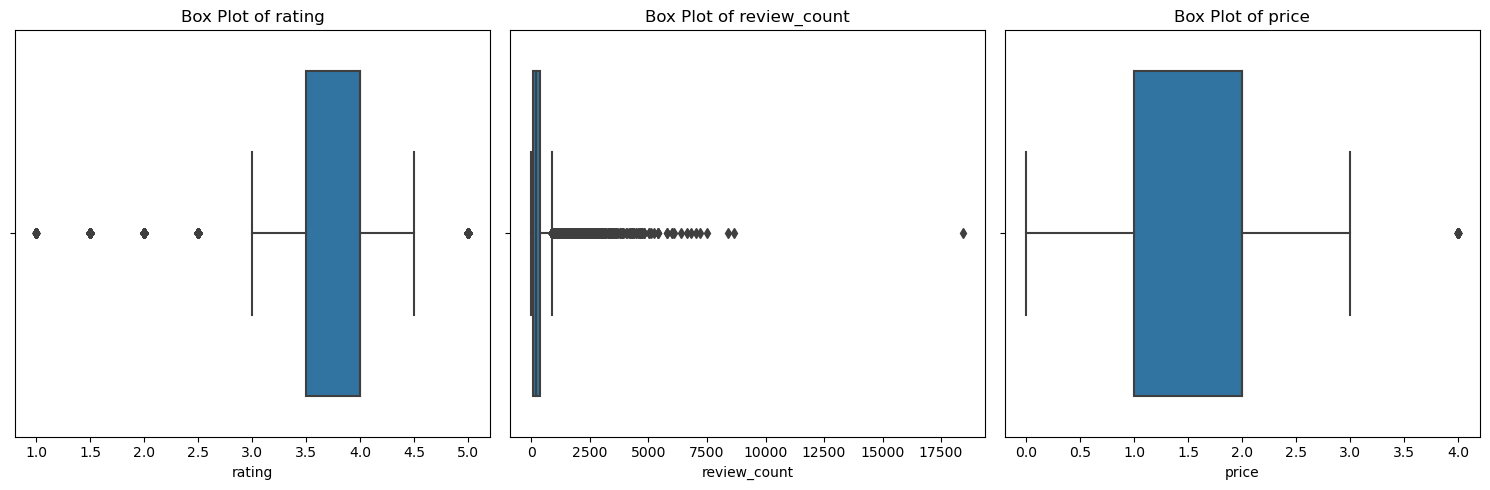

In [93]:
# Define the columns to visualize
columns_to_plot = ['rating', 'review_count', 'price']

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Create box plots using Seaborn
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=yelp_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

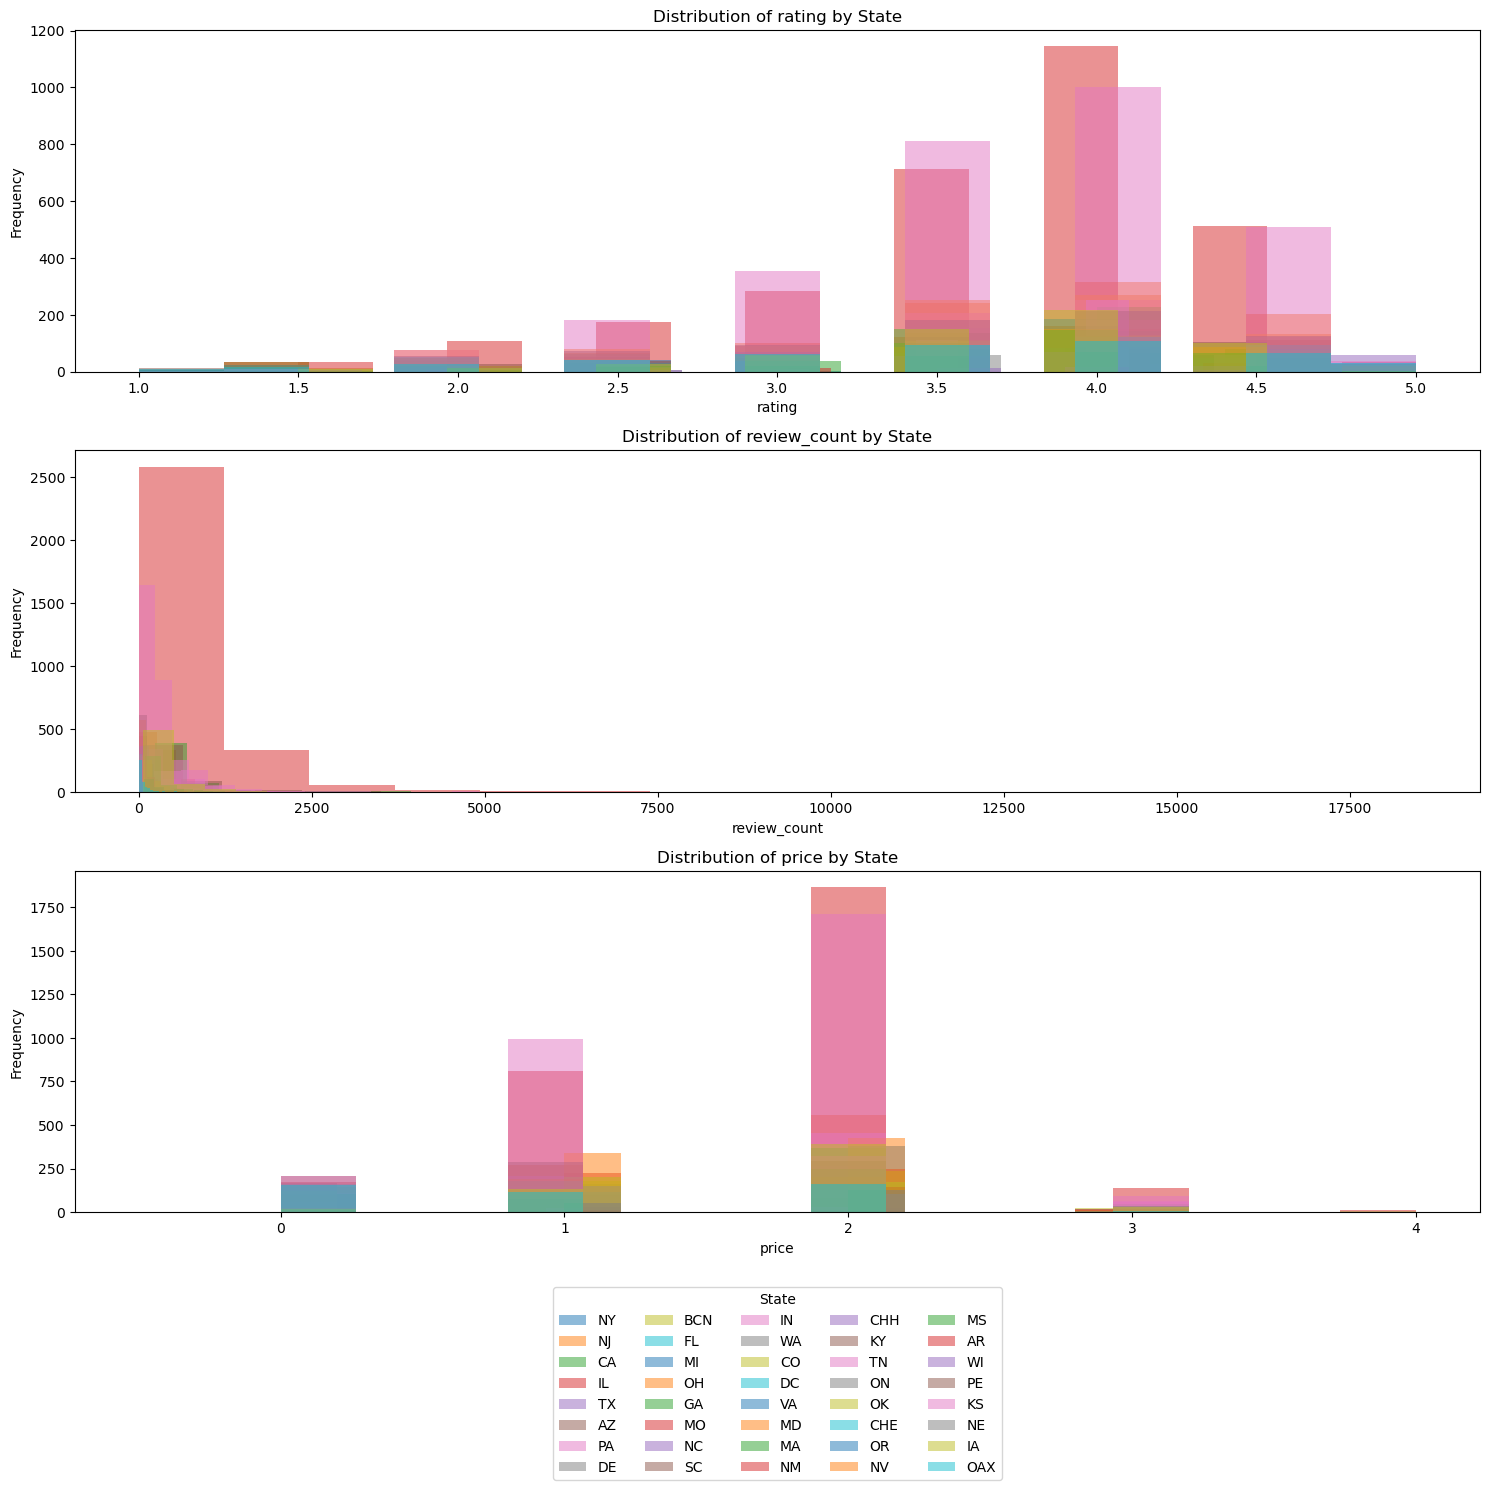

In [122]:
# Create histograms grouped by 'state'
plt.figure(figsize=(15, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    
    # Create a subplot for each column
    for state, data_state in yelp_df.groupby('state'):
        plt.hist(data_state[column], bins=15, alpha=0.5, label=state)
    
    plt.title(f'Distribution of {column} by State')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Create a legend with manually formatted state names for multiple lines
legend_labels = [state.replace(' ', '\n') for state in yelp_df['state'].unique()]
plt.legend(legend_labels, title='State', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.tight_layout()
plt.show()


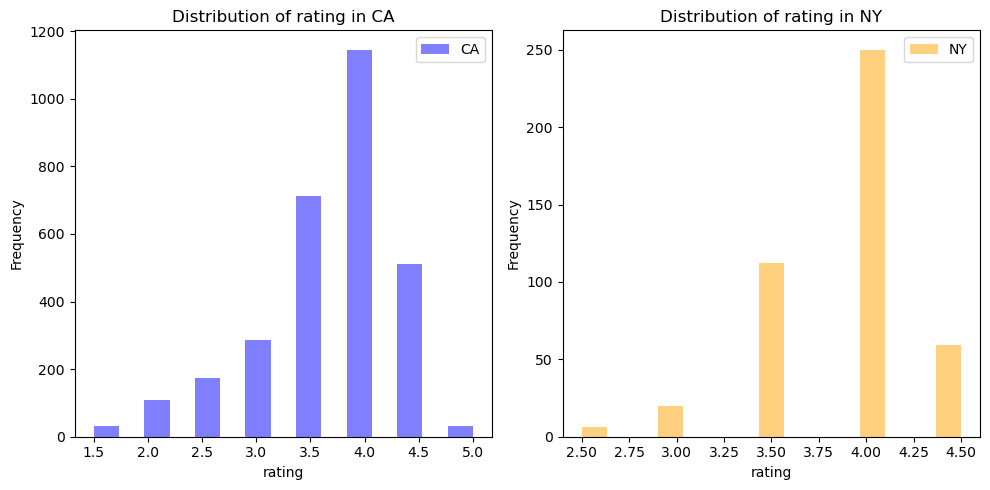

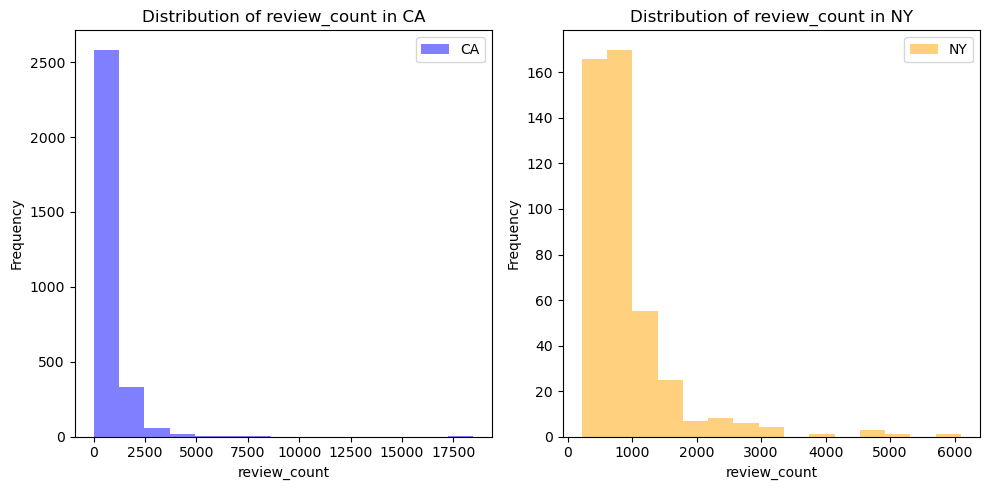

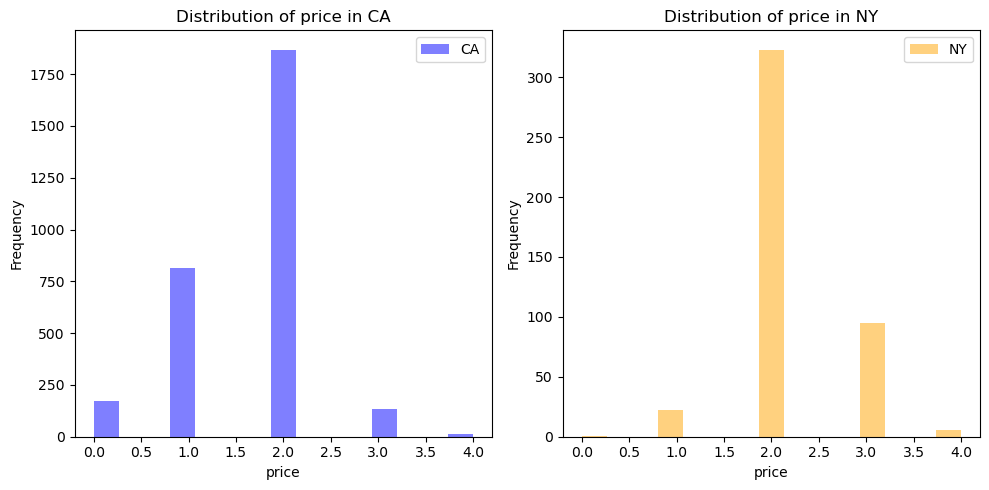

In [85]:
# Create separate plots for CA and NY
for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    
    # Create histograms for CA
    plt.subplot(1, 2, 1)
    plt.hist(yelp_df[yelp_df['state'] == 'CA'][column], bins=15, alpha=0.5, color='blue', label='CA')
    plt.title(f'Distribution of {column} in CA')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Create histograms for NY
    plt.subplot(1, 2, 2)
    plt.hist(yelp_df[yelp_df['state'] == 'NY'][column], bins=15, alpha=0.5, color='orange', label='NY')
    plt.title(f'Distribution of {column} in NY')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

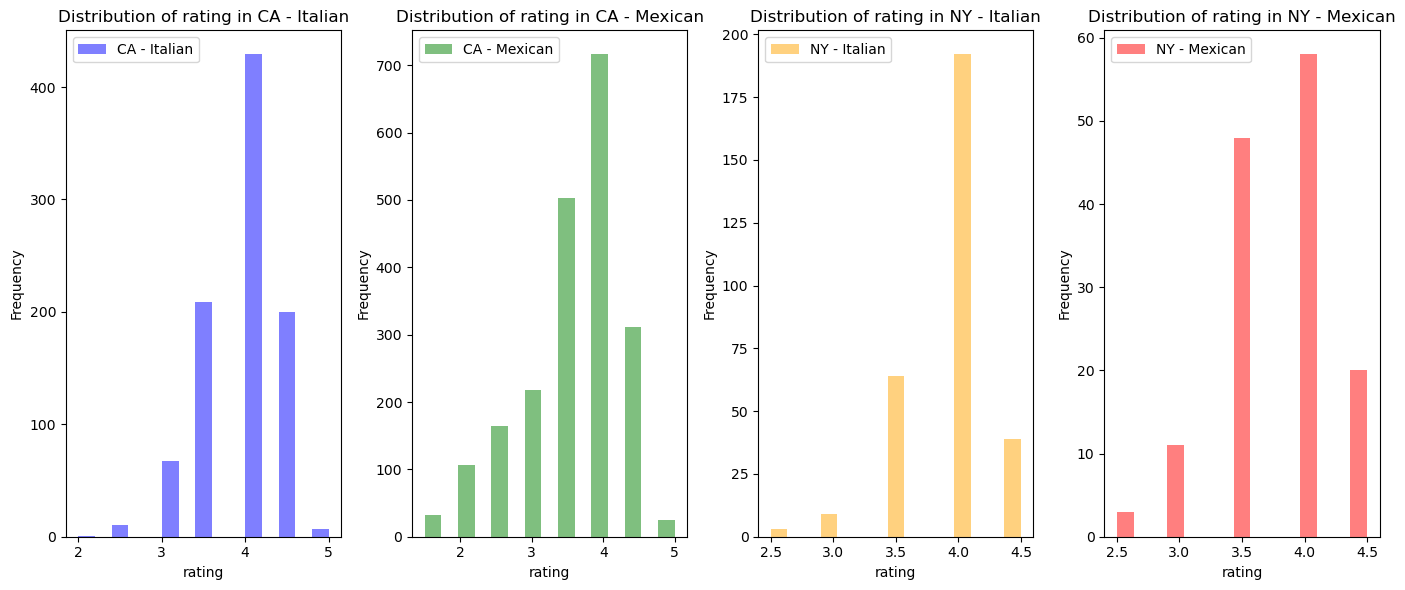

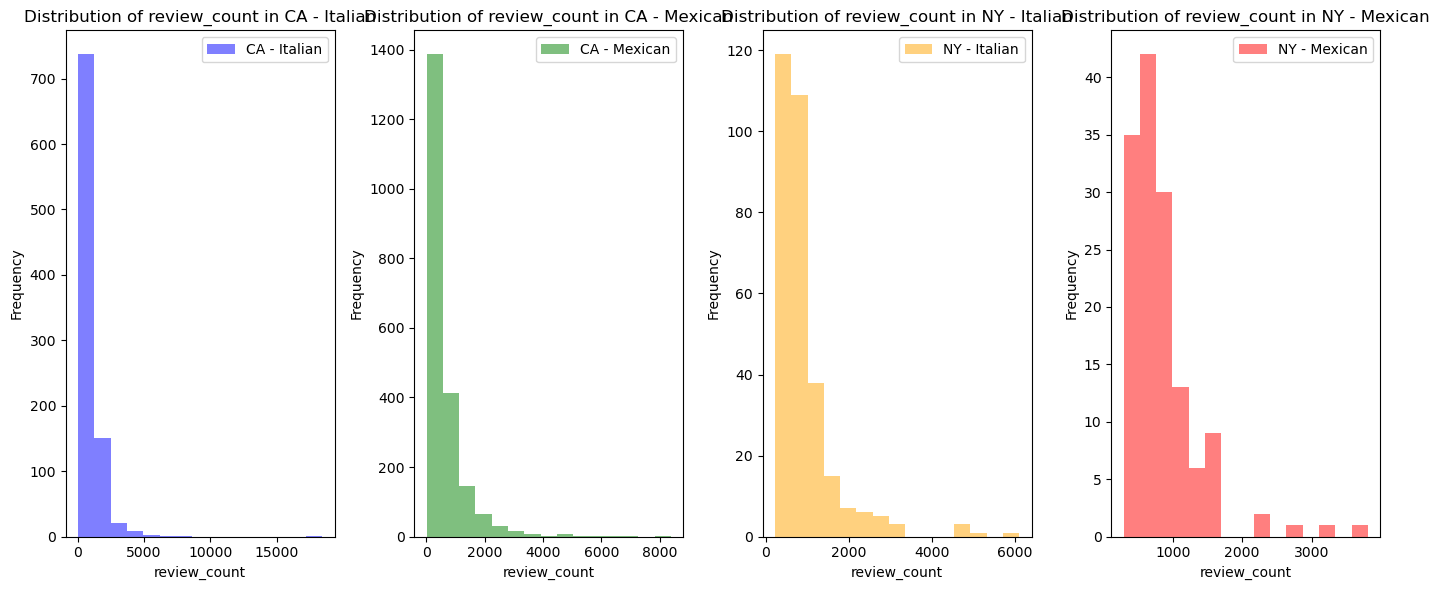

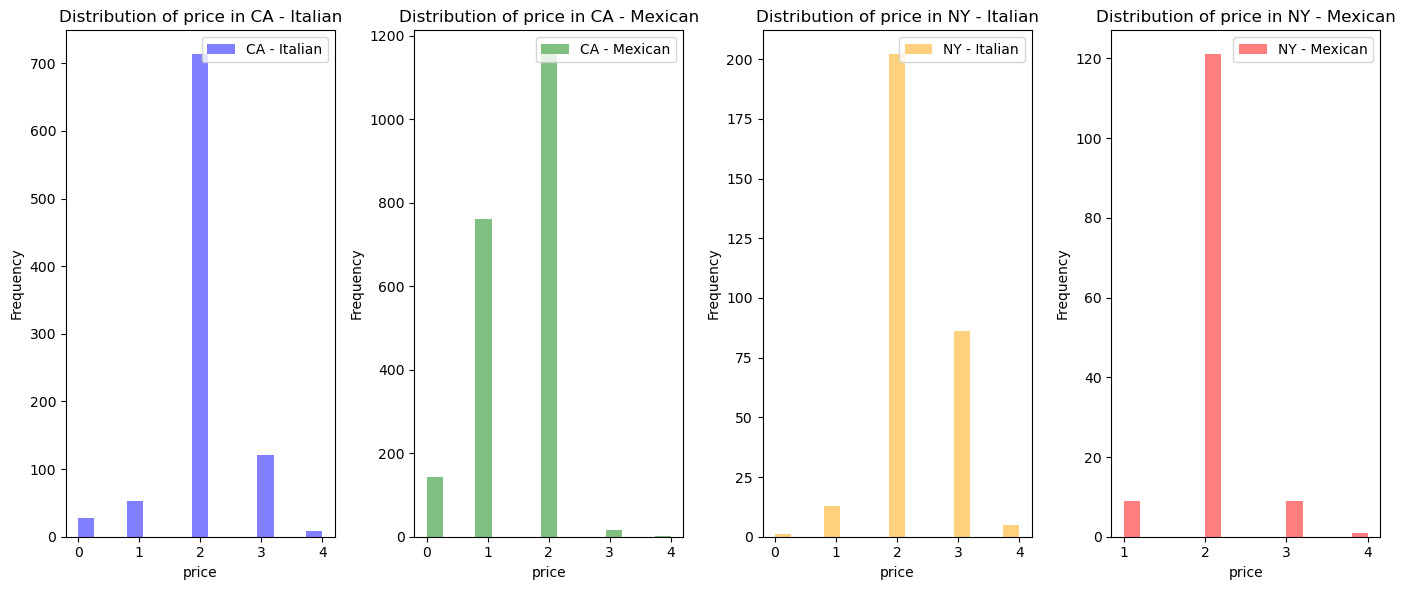

In [99]:
# Create separate plots for CA and NY
for column in columns_to_plot:
    plt.figure(figsize=(14, 6))
    
    # Create histograms for CA (Italian)
    plt.subplot(1, 4, 1)
    plt.hist(yelp_df[(yelp_df['state'] == 'CA') & (yelp_df['cuisines'] == 'Italian')][column], bins=15, alpha=0.5, color='blue', label='CA - Italian')
    plt.title(f'Distribution of {column} in CA - Italian')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Create histograms for CA (Mexican)
    plt.subplot(1, 4, 2)
    plt.hist(yelp_df[(yelp_df['state'] == 'CA') & (yelp_df['cuisines'] == 'Mexican')][column], bins=15, alpha=0.5, color='green', label='CA - Mexican')
    plt.title(f'Distribution of {column} in CA - Mexican')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Create histograms for NY (Italian)
    plt.subplot(1, 4, 3)
    plt.hist(yelp_df[(yelp_df['state'] == 'NY') & (yelp_df['cuisines'] == 'Italian')][column], bins=15, alpha=0.5, color='orange', label='NY - Italian')
    plt.title(f'Distribution of {column} in NY - Italian')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Create histograms for NY (Mexican)
    plt.subplot(1, 4, 4)
    plt.hist(yelp_df[(yelp_df['state'] == 'NY') & (yelp_df['cuisines'] == 'Mexican')][column], bins=15, alpha=0.5, color='red', label='NY - Mexican')
    plt.title(f'Distribution of {column} in NY - Mexican')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

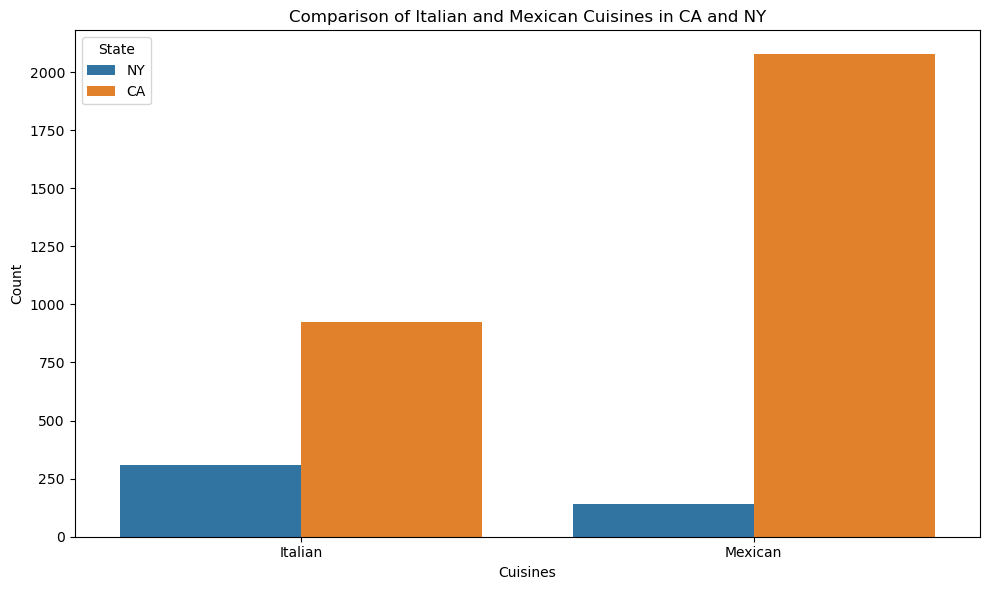

In [109]:
# Filter the DataFrame for restaurants serving Italian or Mexican cuisines in CA and NY
filtered_df = yelp_df[(yelp_df['cuisines'].isin(['Italian', 'Mexican'])) & (yelp_df['state'].isin(['CA', 'NY']))]

# Create a categorical plot to compare cuisines between CA and NY
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisines', hue='state', data=filtered_df)
plt.title('Comparison of Italian and Mexican Cuisines in CA and NY')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.legend(title='State')

plt.tight_layout()
plt.show()

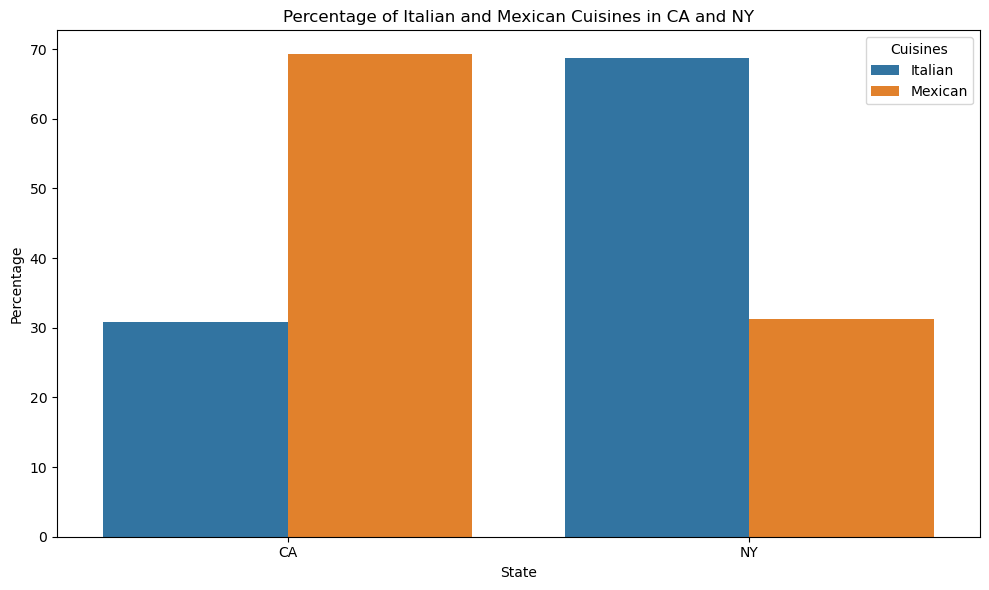

In [110]:
# Calculate the percentage of cuisines in each state
percentage_df = filtered_df.groupby(['state', 'cuisines']).size().unstack(fill_value=0)
percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0) * 100

# Create a bar plot to show the percentage of Italian and Mexican cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='percentage', hue='cuisines', data=percentage_df.reset_index().melt(id_vars=['state'], value_name='percentage'))
plt.title('Percentage of Italian and Mexican Cuisines in CA and NY')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.legend(title='Cuisines')

plt.tight_layout()
plt.show()

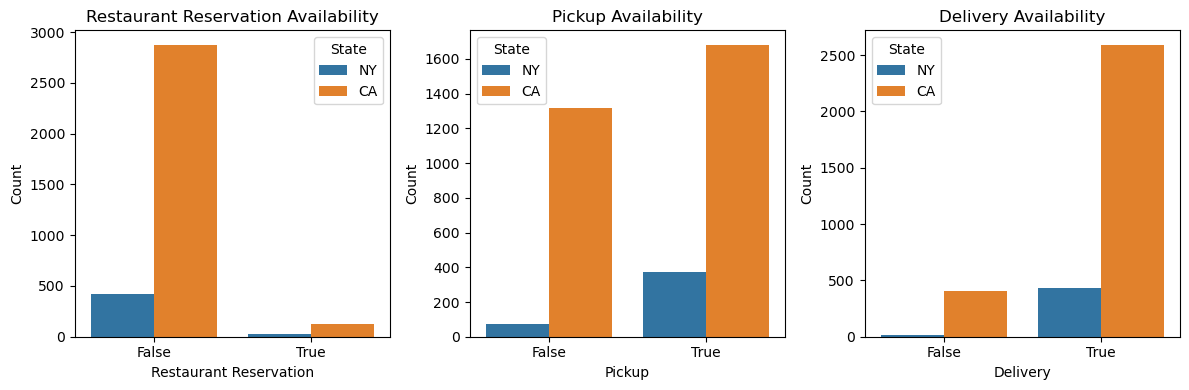

In [111]:
# Create separate plots for 'restaurant_reservation', 'pickup', and 'delivery' counts
plt.figure(figsize=(12, 4))

# Create histograms for 'restaurant_reservation' counts
plt.subplot(1, 3, 1)
sns.countplot(x='restaurant_reservation', hue='state', data=filtered_df)
plt.title('Restaurant Reservation Availability')
plt.xlabel('Restaurant Reservation')
plt.ylabel('Count')
plt.legend(title='State')

# Create histograms for 'pickup' counts
plt.subplot(1, 3, 2)
sns.countplot(x='pickup', hue='state', data=filtered_df)
plt.title('Pickup Availability')
plt.xlabel('Pickup')
plt.ylabel('Count')
plt.legend(title='State')

# Create histograms for 'delivery' counts
plt.subplot(1, 3, 3)
sns.countplot(x='delivery', hue='state', data=filtered_df)
plt.title('Delivery Availability')
plt.xlabel('Delivery')
plt.ylabel('Count')
plt.legend(title='State')

plt.tight_layout()
plt.show()

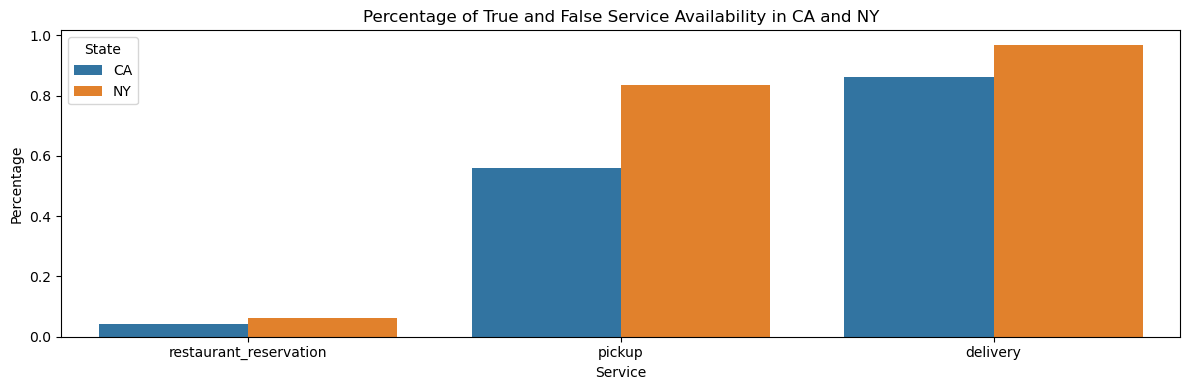

In [116]:
# Calculate the percentage of True values for each service in CA and NY
percentage_df = filtered_df.groupby('state')[['restaurant_reservation', 'pickup', 'delivery']].mean().reset_index()

# Melt the DataFrame to make it suitable for plotting
percentage_df = percentage_df.melt(id_vars=['state'], var_name='Service', value_name='Percentage')

# Create a bar plot to show the percentage of True values for each service
plt.figure(figsize=(12, 4))
sns.barplot(x='Service', y='Percentage', hue='state', data=percentage_df)
plt.title('Percentage of True Service Availability in CA and NY')
plt.xlabel('Service')
plt.ylabel('Percentage')
plt.legend(title='State')

plt.tight_layout()
plt.show() 